# Model

### Importing Packages and CSV

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# For Modeling 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# #For Model Evaluation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
#Importing .csv file and assigning it to the df variable
df = pd.read_csv('df4.csv')

### Preparing DataFrame

In [3]:
#Dropping 'Unnamed: 0' column
df = df.drop(columns = ['Unnamed: 0'])

<AxesSubplot:>

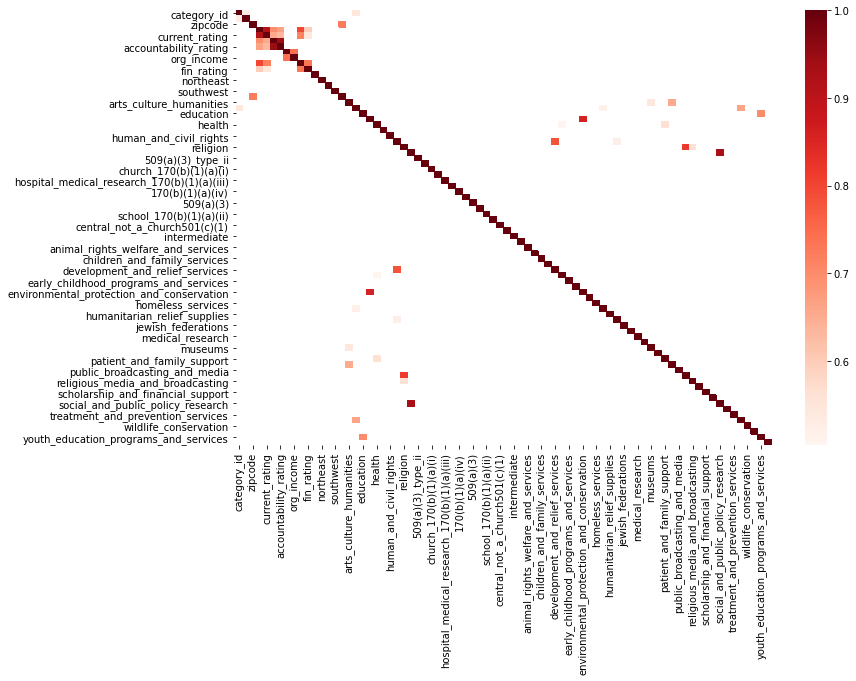

In [4]:
#Looking at features that are highly correlated using a heatmap
corr=df.corr()

kot = corr[corr>=.5]
plt.figure(figsize=(12,8))

sns.heatmap(kot, cmap="Reds")

## Building the Model

### Setting the Features

In [5]:
# Reviewing the above heatmap, I've decided to remove the following features because of high collinearity:
#'zipcode', 'fin_score', 'current_score', 'current_rating', 'accountability_score', 'accountability_rating', 'category_id', 'cause_id', 'religious_activities'

In [6]:
features = ['southeast', 'northeast', 'midwest', 'southwest', 'west', 'arts_culture_humanities','community_development', 'education', 'environment', 'health', 'human_services', 'human_and_civil_rights', 
                'international', 'religion', 'research_and_public_policy', '509(a)(3)_type_ii', '509(a)(3)_type_iii', 'church_170(b)(1)(a)(i)', 'governmental_unit_170(b)(1)(a)(v)', 'hospital_medical_research_170(b)(1)(a)(iii)',
               '509(a)(2)', '170(b)(1)(a)(iv)', '170(b)(1)(a)(vi)', '509(a)(3)', 'private_non-operating_foundation', 'school_170(b)(1)(a)(ii)', 'central_church', 'central_not_a_church501(c)(1)',
               'independent', 'intermediate', 'subordinate', 'animal_rights_welfare_and_services', 'botanical_gardens_parks_and_nature_centers', 'children_and_family_services', 'community_foundations',
               'development_and_relief_services', 'diseases_disorders_and_disciplines', 'early_childhood_programs_and_services', 'education_policy_and_reform', 'environmental_protection_and_conservation',
               'food_banks_pantries_and_distribution', 'homeless_services', 'housing_and_neighborhood_development', 'humanitarian_relief_supplies', 'international_peace_security_and_affairs', 
               'jewish_federations', 'libraries_historical_societies_and_landmark_preservation', 'medical_research', 'multipurpose_human_service_organizations', 'museums', 'non-medical_science_&_technology_research',
               'patient_and_family_support', 'performing_arts', 'public_broadcasting_and_media', 'religious_media_and_broadcasting', 'rescue_missions', 'scholarship_and_financial_support', 
               'social_services', 'social_and_public_policy_research', 'special_education', 'treatment_and_prevention_services', 'united_ways', 'wildlife_conservation', 'youth_development,_shelter,_and_crisis_services',
               'youth_education_programs_and_services', 'zoos_and_aquariums']

### Train test split

In [7]:
#Setting the features to the variable X and the target variable to variable y
X= df[features]
y= df['fin_rating']

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

### Creating Helper Functions for Evaluation

In [8]:
# helper function for metric eval Training set
def train_model_Evaluate(model):
    # Predict values for Test dataset
    y_pred_1 = model.predict(X_train)
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_train, y_pred_1)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Training Set Confusion Matrix", fontdict = {'size':18}, pad = 20)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_train, y_pred_1))
    

In [9]:
# helper function for metric eval of Test Set
def test_model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Testing Set Confusion Matrix", fontdict = {'size':18}, pad = 20)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    

### Logistic Regression

#### Baseline Model

In [10]:
#Fitting the training set 
logreg = LogisticRegression().fit(X_train, y_train)

#Predicting with the test set
y_pred = logreg.predict(X_test)

#Finding the accuracy score of the model
logreg_accuracy_score = accuracy_score(y_pred, y_test)
logreg_accuracy_score

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7770582793709528

##### Baseline Model Evaluation

              precision    recall  f1-score   support

           0       0.20      0.00      0.00      1939
           1       0.78      1.00      0.87      6706

    accuracy                           0.78      8645
   macro avg       0.49      0.50      0.44      8645
weighted avg       0.65      0.78      0.68      8645



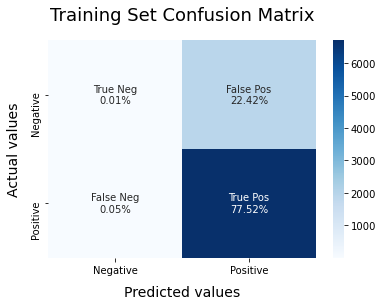

In [11]:
train_model_Evaluate(logreg)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       482
           1       0.78      1.00      0.87      1680

    accuracy                           0.78      2162
   macro avg       0.39      0.50      0.44      2162
weighted avg       0.60      0.78      0.68      2162



/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


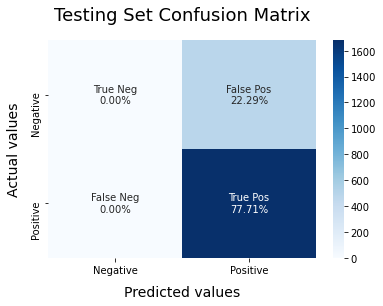

In [12]:
test_model_Evaluate(logreg)

The model does produce a high accuracy score (.78). However, it appears that the model is fitting more towards the positive class. I will optimize my paramaters by doing a gridsearch to see if I get better results

#### Logistic Regression Model 2: with class weights 

In [13]:
#Creating weights to input for the class_weights parameter
weights = y_train.value_counts(normalize=True).apply(lambda x: 1/x)
weights/= weights.min()
weights=weights.to_dict()

# Setting parameters for the gridsearch
lr_param_grid = {
    "penalty": ["l2", "none"],
    "C": [.001, .1, 1, 10, 100],
    "solver": ['newton-cg','lbfgs','sag','saga'],
    "max_iter" : [100, 300],
 "class_weight" : [weights, 'balanced'],
}

#Instantiating the gridsearch
lr_grid = LogisticRegression(random_state=42)
lr_gridsearch = GridSearchCV(lr_grid, lr_param_grid, cv=3, return_train_score=True, n_jobs=-1, verbose=-1)

In [15]:
# Fitting the data to the gridsearch
lr_gridsearch.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished
/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'class_weight': [{0: 3.4584837545126357, 1: 1.0},
                                          'balanced'],
                         'max_iter': [100, 300], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
          

In [16]:
#Output to see the optimal parameters
print("Training Accuracy: {:.4}%".format(lr_gridsearch.best_score_ * 100))
print("")
print("Optimal Parameters: {}".format(lr_gridsearch.best_params_))
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print("Best Model: {}".format(lr_gridsearch.best_estimator_))

Training Accuracy: 63.53%

Optimal Parameters: {'C': 0.001, 'class_weight': {1: 1.0, 0: 3.4584837545126357}, 'max_iter': 300, 'penalty': 'none', 'solver': 'sag'}
Best Model: LogisticRegression(C=0.001, class_weight={0: 3.4584837545126357, 1: 1.0},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=300, multi_class='warn', n_jobs=None,
                   penalty='none', random_state=42, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)


In [17]:
#Pickling so I do not have to run the gridsearch again 

# pickle list object
lr_pickle_path = 'lr_best_model.pkl'

#Create a variable to pickle and open it in write mode
lr_model_pickle = open(lr_pickle_path, 'wb')
pickle.dump(lr_gridsearch.best_estimator_, lr_model_pickle)
lr_model_pickle.close()

In [18]:
#Using the optimal parameters found in the gridsearch to instantiate the model
lr2 = LogisticRegression(C=.001,class_weight= {1: 1.0, 0: 3.4584837545126357}, 
                        max_iter= 300, penalty= 'none', solver= 'sag')
#Fitting the training set 
lr2.fit(X_train, y_train)

#Predicting with the test set
y_pred2 = lr2.predict(X_test)

#Finding the accuracy score of the model
logreg_accuracy_score2 = accuracy_score(y_pred2, y_test)
logreg_accuracy_score2

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7067530064754857

##### Logistic Regression Model 2 Evaluation

              precision    recall  f1-score   support

           0       0.28      0.22      0.24      1939
           1       0.79      0.84      0.81      6706

    accuracy                           0.70      8645
   macro avg       0.53      0.53      0.53      8645
weighted avg       0.67      0.70      0.68      8645



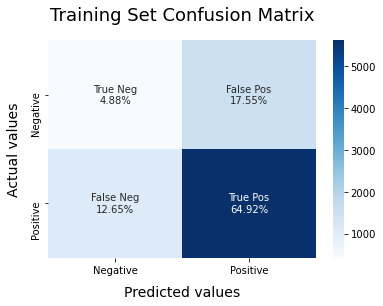

In [19]:
train_model_Evaluate(lr2)

              precision    recall  f1-score   support

           0       0.29      0.21      0.25       482
           1       0.79      0.85      0.82      1680

    accuracy                           0.71      2162
   macro avg       0.54      0.53      0.53      2162
weighted avg       0.68      0.71      0.69      2162



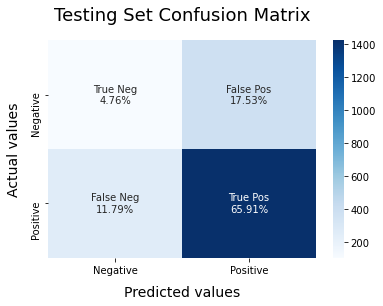

In [20]:
test_model_Evaluate(lr2)

This model performs better than the baseline logistic regression. There is a slight improvement in precicion and f1 score. We see a major improvement in the recall and have an accuracy score of .71. I would like to try one additional logistic regression model with the class weight being balanced.

#### Logistic Regression 3: Class weight balanced

In [21]:
lr3 = LogisticRegression(C=.001,class_weight= 'balanced', 
                        max_iter= 300, penalty= 'none', solver= 'sag')
#Fitting the training set 
lr3.fit(X_train, y_train)

#Predicting with the test set
y_pred3 = lr3.predict(X_test)

#Finding the accuracy score of the model
logreg_accuracy_score3 = accuracy_score(y_pred3, y_test)
logreg_accuracy_score3

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.4532839962997225

##### Logistic Regression Model 3 Evaluation

              precision    recall  f1-score   support

           0       0.26      0.74      0.39      1939
           1       0.84      0.40      0.54      6706

    accuracy                           0.47      8645
   macro avg       0.55      0.57      0.46      8645
weighted avg       0.71      0.47      0.51      8645



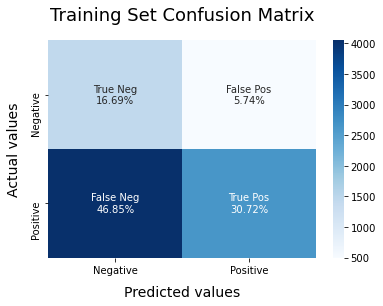

In [22]:
train_model_Evaluate(lr3)

              precision    recall  f1-score   support

           0       0.25      0.72      0.37       482
           1       0.82      0.38      0.52      1680

    accuracy                           0.45      2162
   macro avg       0.54      0.55      0.44      2162
weighted avg       0.70      0.45      0.48      2162



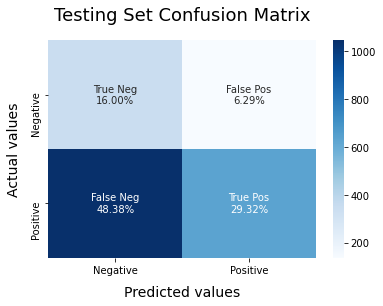

In [23]:
test_model_Evaluate(lr3)

There is a slight improvement once more and an accuracy score of .45. This logistic regression model has performed the best. 

In [24]:
print('Baseline Logistic Regression')
print('Accuracy:', logreg_accuracy_score)
print('Recall score is 1 toward the majority class. Although there is a high accuracy there is no balance for the precision, recall and f1') 
print('')

print('Logistic Regression 2')
print('Accuracy:', logreg_accuracy_score2) 
print('Recall score is more balanced and both precision and f1 have improved (though still leaning towards the majority class). This model is better than the baseline model')
print('')

print('Logistic Regression 3 (Best Logistic Model)')
print('Accuracy:', logreg_accuracy_score3)
print('Recall, precision and f1 score are better balanced') 

Baseline Logistic Regression
Accuracy: 0.7770582793709528
Recall score is 1 toward the majority class. Although there is a high accuracy there is no balance for the precision, recall and f1

Logistic Regression 2
Accuracy: 0.7067530064754857
Recall score is more balanced and both precision and f1 have improved (though still leaning towards the majority class). This model is better than the baseline model

Logistic Regression 3 (Best Logistic Model)
Accuracy: 0.4532839962997225
Recall, precision and f1 score are better balanced


### Decision Tree

In [25]:
#Instantiating the model
classifier = DecisionTreeClassifier()

#Fitting the training set to the model
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
#Predicting using the test set
y_pred_tree = classifier.predict(X_test)

decision_tree_accuracy_score = accuracy_score(y_pred_tree, y_test)
decision_tree_accuracy_score

0.7622571692876966

##### Decision Tree Evaluation

              precision    recall  f1-score   support

           0       0.71      0.10      0.17      1939
           1       0.79      0.99      0.88      6706

    accuracy                           0.79      8645
   macro avg       0.75      0.54      0.53      8645
weighted avg       0.77      0.79      0.72      8645



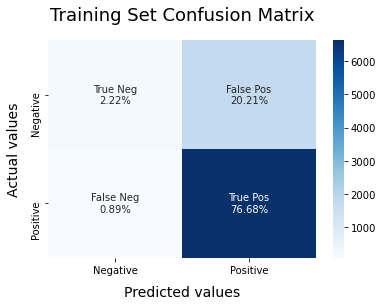

In [27]:
train_model_Evaluate(classifier)

              precision    recall  f1-score   support

           0       0.29      0.05      0.08       482
           1       0.78      0.97      0.86      1680

    accuracy                           0.76      2162
   macro avg       0.54      0.51      0.47      2162
weighted avg       0.67      0.76      0.69      2162



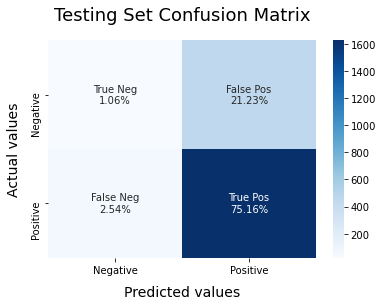

In [28]:
test_model_Evaluate(classifier)

The Decision Tree's performance shows an accuracy of .76. However, the precision, recall and f1 score are leaning towards the majority class. 

In [29]:
print('Decision Tree')
print('Accuracy:', decision_tree_accuracy_score)
print('The precision, recall and f1 score are leaning towards the majority class. Logistic Regression Model 3 is still the best thus far')

Decision Tree
Accuracy: 0.7622571692876966
The precision, recall and f1 score are leaning towards the majority class. Logistic Regression Model 3 is still the best thus far


### Random Forest

#### Random Forest Baseline Model

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)
rf_accuracy_score = accuracy_score(y_pred_forest, y_test)
rf_accuracy_score

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7687326549491211

##### Random Forest Baseline Model Evaluation

              precision    recall  f1-score   support

           0       0.75      0.08      0.14      1939
           1       0.79      0.99      0.88      6706

    accuracy                           0.79      8645
   macro avg       0.77      0.54      0.51      8645
weighted avg       0.78      0.79      0.71      8645



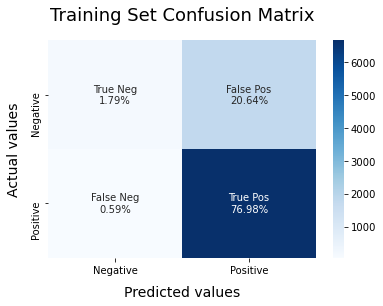

In [31]:
train_model_Evaluate(rf)

              precision    recall  f1-score   support

           0       0.33      0.04      0.06       482
           1       0.78      0.98      0.87      1680

    accuracy                           0.77      2162
   macro avg       0.55      0.51      0.47      2162
weighted avg       0.68      0.77      0.69      2162



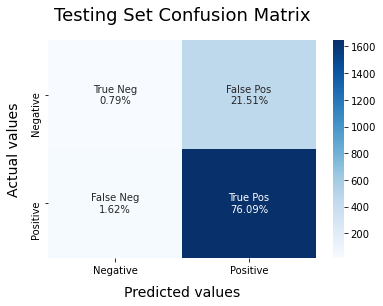

In [32]:
test_model_Evaluate(rf)

This initial baseline Random Forest model has a .77 accuracy score but unfortunately is extremely imbalanced in recall and f1. I want to do a grid search to get the best parameters to see if that improved the scores

#### Random Forest Model 2: Gridsearch with weights

In [32]:
rf_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 5, 8, 12, 16],
    "max_features": [None,4,7,12],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf" : [1, 2, 5, 7],
    "n_estimators" : [10, 30, 100, 500],
 "class_weight" : [weights],
}

rf_grid = RandomForestClassifier(random_state=42)
rf_gridsearch = GridSearchCV(rf_grid, rf_param_grid, cv=3, return_train_score=True, n_jobs=-1, verbose=-1)

In [30]:
rf_gridsearch.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 3520 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 6912 out of 6912 | elapsed: 33.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': [{0: 

In [31]:
print("Training Accuracy: {:.4}%".format(rf_gridsearch.best_score_ * 100))
print("")
print("Optimal Parameters: {}".format(rf_gridsearch.best_params_))
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print("Best Model: {}".format(rf_gridsearch.best_estimator_))


Training Accuracy: 64.67%

Optimal Parameters: {'class_weight': {1: 1.0, 0: 3.4584837545126357}, 'criterion': 'gini', 'max_depth': 2, 'max_features': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 10}
Best Model: RandomForestClassifier(bootstrap=True,
                       class_weight={0: 3.4584837545126357, 1: 1.0},
                       criterion='gini', max_depth=2, max_features=7,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


In [33]:
# pickle list object
rf_pickle_path = 'rf_best_model.pkl'

#Create a variable to pickle and open it in write mode
rf_model_pickle = open(rf_pickle_path, 'wb')
pickle.dump(rf_gridsearch.best_estimator_, rf_model_pickle)
rf_model_pickle.close()

In [33]:
rf2 = RandomForestClassifier(bootstrap=True,
                       class_weight={0: 3.4584837545126357, 1: 1.0},
                       criterion='gini', max_depth=2, max_features=7,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)
rf2.fit(X_train, y_train)
y_pred_rf2 = rf2.predict(X_test)
rf2_accuracy_score = accuracy_score(y_pred_rf2, y_test)
rf2_accuracy_score

0.5804810360777058

              precision    recall  f1-score   support

           0       0.27      0.51      0.35      1939
           1       0.81      0.60      0.69      6706

    accuracy                           0.58      8645
   macro avg       0.54      0.56      0.52      8645
weighted avg       0.69      0.58      0.62      8645



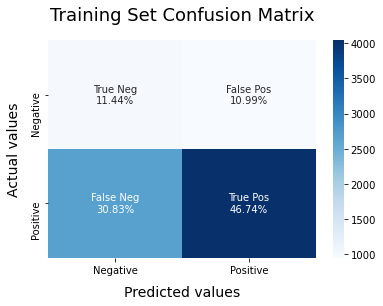

In [34]:
train_model_Evaluate(rf2)

              precision    recall  f1-score   support

           0       0.27      0.52      0.36       482
           1       0.81      0.60      0.69      1680

    accuracy                           0.58      2162
   macro avg       0.54      0.56      0.52      2162
weighted avg       0.69      0.58      0.61      2162



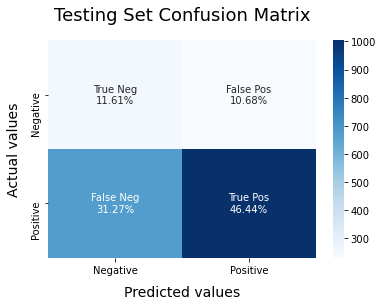

In [35]:
test_model_Evaluate(rf2)

This model appears to have a more balanced recall and an accuracy score of .58. 

In [37]:
print('Random Forest Baseline')
print('Accuracy:', rf_accuracy_score)
print('There is an extreme imbalance in recall, precision, and f1 score')
print('')

print('Random Forest 2 (Best Random Forest Model)')
print('Accuracy:', rf2_accuracy_score)
print('More Balanced on the recall, precision, and f1-score')

Random Forest Baseline
Accuracy: 0.7687326549491211
There is an extreme imbalance in recall, precision, and f1 score

Random Forest 2 (Best Random Forest Model)
Accuracy: 0.5804810360777058
More Balanced on the recall, precision, and f1-score


In [44]:
# importance = rf2.feature_importances_
# for i,v in enumerate(importance):
#     print('feature:%0d, score: %.5f' %(i,v))

### KNN

#### Baseline KNN Model

In [38]:
#Fitting the training set to the model
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
#Making predictions using the test set
y_pred_knn= knn.predict(X_test)
y_pred_knn

array([1, 1, 1, ..., 1, 1, 1])

##### Evaluating Baseline KNN Model

              precision    recall  f1-score   support

           0       0.33      0.17      0.22      1939
           1       0.79      0.90      0.84      6706

    accuracy                           0.74      8645
   macro avg       0.56      0.54      0.53      8645
weighted avg       0.69      0.74      0.70      8645



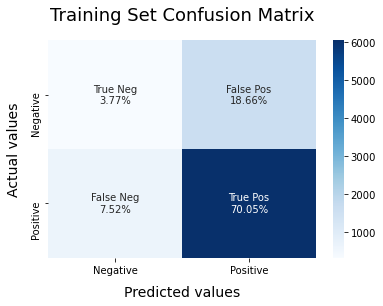

In [40]:
train_model_Evaluate(knn)

              precision    recall  f1-score   support

           0       0.23      0.11      0.15       482
           1       0.78      0.89      0.83      1680

    accuracy                           0.72      2162
   macro avg       0.50      0.50      0.49      2162
weighted avg       0.65      0.72      0.68      2162



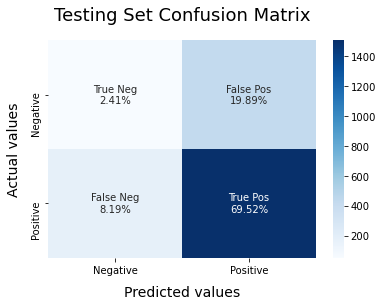

In [41]:
test_model_Evaluate(knn)

In [42]:

knn_accuracy_score = accuracy_score(y_test, y_pred_knn)
knn_accuracy_score

0.7192414431082331

This baseline model again does not do well with recall and precision but has an accuracy score of .72. This could be attributed to class imbalance

#### Upsampled KNN Model 

In [43]:
training = pd.concat([X_train, y_train], axis=1)

In [44]:
low_fin_rating = training[training.fin_rating==0] 
high_fin_rating = training[training.fin_rating==1]

In [45]:
fin_rating_upsampled = resample(high_fin_rating,
                        replace=True,
                        n_samples=len(low_fin_rating),
                        random_state=23)

In [46]:
fin_rating_upsampled.shape

(1939, 67)

In [47]:
df['fin_rating'].value_counts()

1    8386
0    2421
Name: fin_rating, dtype: int64

In [48]:
upsampled = pd.concat([low_fin_rating, fin_rating_upsampled])

upsampled.fin_rating.value_counts()

1    1939
0    1939
Name: fin_rating, dtype: int64

In [49]:
y_train_up = upsampled.fin_rating
X_train_up = upsampled.drop('fin_rating', axis=1)

upsampled_knn = KNeighborsClassifier(n_neighbors=5, p=2)
upsampled_knn.fit(X_train_up, y_train_up)
upsampled_pred = upsampled_knn.predict(X_test)


knn_upsampled_accuracy_score= accuracy_score(y_test, upsampled_pred)
knn_upsampled_accuracy_score

0.3885291396854764

##### Evaluating Upsampled KNN Model 

              precision    recall  f1-score   support

           0       0.25      0.86      0.39      1939
           1       0.86      0.25      0.39      6706

    accuracy                           0.39      8645
   macro avg       0.56      0.56      0.39      8645
weighted avg       0.73      0.39      0.39      8645



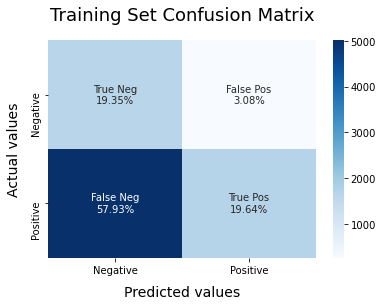

In [50]:
train_model_Evaluate(upsampled_knn)

              precision    recall  f1-score   support

           0       0.25      0.85      0.38       482
           1       0.85      0.26      0.40      1680

    accuracy                           0.39      2162
   macro avg       0.55      0.55      0.39      2162
weighted avg       0.72      0.39      0.39      2162



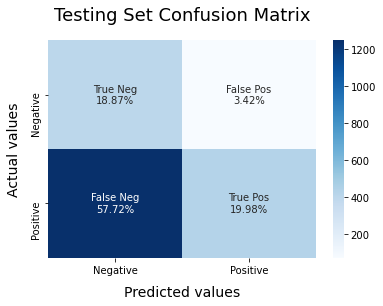

In [51]:
test_model_Evaluate(upsampled_knn)

This model does a little bit better with precision and recall but the accuracy score is .39. 

In [53]:
print('KNN Baseline')      
print('Accuracy:', knn_accuracy_score)
print('Imbalanced F1, Recall and Precision scores')
print('')

print('KNN Upsampled (Best KNN Model)')
print('Accuracy:', knn_upsampled_accuracy_score)
print('Small improvement in precision and recall')

KNN Baseline
Accuracy: 0.7192414431082331
Imbalanced F1, Recall and Precision scores

KNN Upsampled (Best KNN Model)
Accuracy: 0.3885291396854764
Small improvement in precision and recall


### Comparing Models

In [66]:
print('Logistic Regression 3')
print('Accuracy:', logreg_accuracy_score3)
print('Precision (.57) Recall (.34), and f1(.15)') 
print('')

print('Random Forest 2')
print('Accuracy:', rf_accuracy_score)
print('Precision (.54) Recall (.8), and f1(.33)')
print('')
      
print('KNN Upsampled')
print('Accuracy:', knn_upsampled_accuracy_score)
print('Precision (.60), Recall(.59) and f1 (.02)')


Logistic Regression 3
Accuracy: 0.4532839962997225
Precision (.57) Recall (.34), and f1(.15)

Random Forest 2
Accuracy: 0.7687326549491211
Precision (.54) Recall (.8), and f1(.33)

KNN Upsampled
Accuracy: 0.3885291396854764
Precision (.60), Recall(.59) and f1 (.02)


# Final Model

The best model is the Random Forest 2. This model has the most balanced recall and is .76 accuracy.

In [ ]:
rf2 = RandomForestClassifier(bootstrap=True,
                       class_weight={0: 3.4584837545126357, 1: 1.0},
                       criterion='gini', max_depth=2, max_features=7,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)
rf2.fit(X_train, y_train)
y_pred_rf2 = rf2.predict(X_test)
rf2_accuracy_score = accuracy_score(y_pred_rf2, y_test)